# Shapiro-Wilk test for normal and lognormal distributions

In [1]:
import sandy

In [2]:
import logging
import pandas as pd
import numpy as np
import scipy

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
logging.getLogger().setLevel(logging.WARN)

Generate 5000 xs samples normally and log-normally distributed

In [5]:
def test_shapiro(smp, size=None, pdf="normal"):
    size_ = size or smp.data.shape[1]
    names = ["statistic", "pvalue"]

    data = smp.data.iloc[:, :size_]
    if pdf.lower() == "lognormal":
        data = np.log(smp.data)

    df = pd.DataFrame({idx: scipy.stats.shapiro(row) for idx, row in data.iterrows()}, index=names).T
    return df.rename_axis(data.index.names)

In [6]:
tape = sandy.get_endf6_file("jeff_33", "xs", 10010)
njoy_kws = dict(err=1, errorr33_kws=dict(mt=102))
nsmp = 5000
seed = 5

smp_norm = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="normal"))[33]
smp_lognorm = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="lognormal"))[33]


 njoy 2016.74  12Jan24                                       01/18/24 19:03:17
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.0s

 moder...                                                                 0.0s

 errorr...                                                                0.0s

 processing mat   125
 ---------------------
   1-H -  1 LANL       EVAL-OCT05 G.M.Hale                           

 covariances calculated for  1 reactions and  251 groups                  0.0s
                                                                          0.1s
 *****************************************************************************



 njoy 2016.74  12Jan24                                       01/18/24 19:03:42
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.0s

 moder...                                                                 0.0s

 errorr...                                                                0.0s

 processing mat   125
 ---------------------
   1-H -  1 LANL       EVAL-OCT05 G.M.Hale                           

 covariances calculated for  1 reactions and  251 groups                  0.0s
                                                                          0.1s
 *****************************************************************************


##  Shapiro-Wilk test normal samples and normal distribution

In [7]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = test_shapiro(smp_norm, pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = test_shapiro(smp_norm, pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

/opt/hostedtoolcache/Python/3.12.1/x64/lib/python3.12/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/hostedtoolcache/Python/3.12.1/x64/lib/python3.12/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


/opt/hostedtoolcache/Python/3.12.1/x64/lib/python3.12/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/hostedtoolcache/Python/3.12.1/x64/lib/python3.12/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


/opt/hostedtoolcache/Python/3.12.1/x64/lib/python3.12/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


/opt/hostedtoolcache/Python/3.12.1/x64/lib/python3.12/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,8.32398e-01,3.57599e-02,9.35099e-01,3.25522e-42
50,9.57182e-01,6.77487e-02,9.35099e-01,3.25522e-42
100,9.69973e-01,2.19993e-02,9.35099e-01,3.25522e-42
500,9.88972e-01,8.12345e-04,9.35099e-01,3.25522e-42
1000,9.91070e-01,9.32783e-06,9.35099e-01,3.25522e-42
5000,9.89413e-01,6.44180e-19,9.35099e-01,3.25522e-42


### Plot the distribution of the parameter with closest and farthest resemblance to a normal PDF

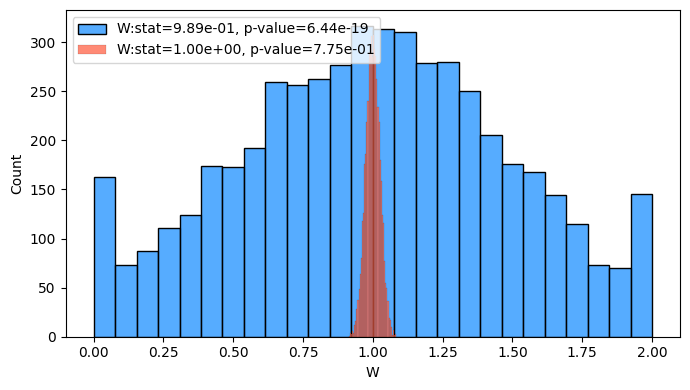

In [8]:
test = test_shapiro(smp_norm, pdf="normal", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_norm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_norm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()

## Shapiro-Wilk test for lognormal samples and lognormal distribution

In [9]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = test_shapiro(smp_lognorm, pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = test_shapiro(smp_lognorm, pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,7.01119e-01,9.08847e-04,9.99359e-01,7.35991e-02
50,8.30163e-01,4.68332e-06,9.99359e-01,7.35991e-02
100,8.78410e-01,1.55527e-07,9.99359e-01,7.35991e-02
500,8.95228e-01,5.48732e-18,9.99359e-01,7.35991e-02
1000,8.70237e-01,5.27544e-28,9.99359e-01,7.35991e-02
5000,8.97899e-01,0.00000e+00,9.99359e-01,7.35991e-02


### Plot the distribution of the parameter with closest and farthest resemblance to a lognormal PDF

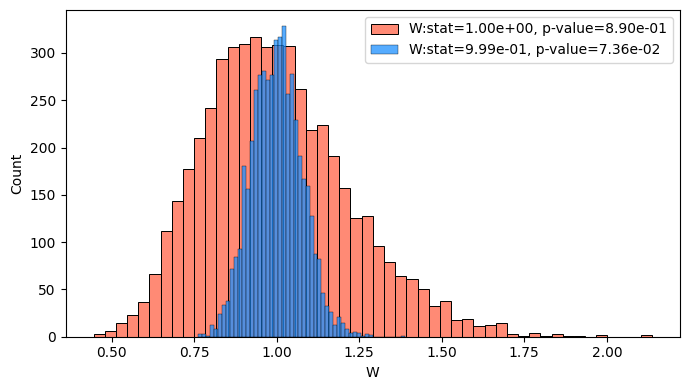

In [10]:
test = test_shapiro(smp_lognorm, pdf="lognormal", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_lognorm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_lognorm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()